In [0]:
#import of required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.covariance import EllipticEnvelope
import collections
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn import metrics

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers

# Loading the Data 
#### Removing Columns Date and Adj_Close
#### Also making a copy of column Close which is named as 'y' 

In [0]:
dataFrame = pd.read_csv('CSC215_P2_Stock_Price.csv')
dataFrame.drop(['Date', 'Adj_Close'], axis=1, inplace=True)
dataFrame['y'] = dataFrame['Close']

In [0]:
dataFrame.head()

,Open,High,Low,Close,Volume,y
0,3.812500,4.156250,3.812500,4.125000,3675600,4.125000
1,4.125000,4.125000,4.000000,4.015625,1077600,4.015625
2,4.000000,4.031250,3.953125,4.000000,437200,4.000000
3,4.000000,4.000000,3.843750,3.843750,1883600,3.843750
4,3.734375,3.734375,3.390625,3.390625,7931600,3.390625


In [0]:
df_y_cnn = dataFrame[['y']].copy()
df_x_cnn = dataFrame.drop(['y'], axis = 1)

In [0]:
df_x_cnn.head()

,Open,High,Low,Close,Volume
0,3.812500,4.156250,3.812500,4.125000,3675600
1,4.125000,4.125000,4.000000,4.015625,1077600
2,4.000000,4.031250,3.953125,4.000000,437200
3,4.000000,4.000000,3.843750,3.843750,1883600
4,3.734375,3.734375,3.390625,3.390625,7931600


In [0]:
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
    
    
import sklearn
import sklearn.preprocessing
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['Open'] = min_max_scaler.fit_transform(df.Open.values.reshape(-1,1))
    df['High'] = min_max_scaler.fit_transform(df.High.values.reshape(-1,1))
    df['Low'] = min_max_scaler.fit_transform(df.Low.values.reshape(-1,1))
    df['Volume'] = min_max_scaler.fit_transform(df.Volume.values.reshape(-1,1))
    df['Close'] = min_max_scaler.fit_transform(df['Close'].values.reshape(-1,1))
    return df


df_x_cnn = normalize_data(df_x_cnn)


import numpy as np

def to_sequences(seq_size, data1, data2):
    x = []
    y = []

    for i in range(len(data1)-seq_size):
        #print(i)
        window = data1[i:(i+seq_size)]
        after_window = data2[i+seq_size]
        window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x), np.array(y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
x_cnn = df_x_cnn.as_matrix()
y_cnn = df_y_cnn['y'].as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [0]:
SEQUENCE_SIZE = 7
x_cnn_seq, y_cnn_seq = to_sequences(SEQUENCE_SIZE,x_cnn,y_cnn)
#x_lstm_seq_test,y_lstm_seq_test = to_sequences(SEQUENCE_SIZE,X_test,y_test)

print("Shape of x_cnn_seq: {}".format(x_cnn_seq_train.shape))
#print("Shape of x_test: {}".format(x_lstm_seq_test.shape))
print("Shape of y_cnn_seq: {}".format(y_cnn_seq_train.shape))
#print("Shape of y_test: {}".format(y_lstm_seq_test.shape))

Shape of x_cnn_seq: (4385, 7, 1, 5)
Shape of y_cnn_seq: (4385,)


In [0]:
x_cnn_seq_4d = x_cnn_seq.reshape(4385,1,7,5)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x_cnn_seq_4d, y_cnn_seq, test_size=0.3, random_state=42)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')


In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, Conv1D, MaxPooling2D
from datetime import datetime

In [0]:
model_cnn = Sequential()
model_cnn.add(Conv2D(64, kernel_size=(1, 7), strides=(1, 1), padding='valid',input_shape=(1 , 7, 5), activation ="relu"))
model_cnn.add(MaxPooling2D(pool_size=(1,1)))
model_cnn.add(Flatten())
model_cnn.add(Dense(1024, activation ="relu"))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(1))
model_cnn.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])
model_cnn.summary()

t1 = datetime.now()
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="best_weights_cnn_relu.hdf5", verbose=0, save_best_only=True) # save best model
history = model_cnn.fit(X_train, y_train, validation_data= (X_test, y_test), callbacks=[monitor,checkpointer],verbose=2,epochs=100)
model_cnn.load_weights('best_weights_cnn_relu.hdf5') # load weights from best model

train_time = datetime.now() - t1



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 1, 1, 64)          2304      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              66560     
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1025      
Total params: 69,889
Trainable params: 69,889
Non-trainable params: 0
__________________________________________________

Score_relu_adam_train (RMSE): 1.3618954420089722
Score_relu_adam_test (RMSE): 1.3095741271972656


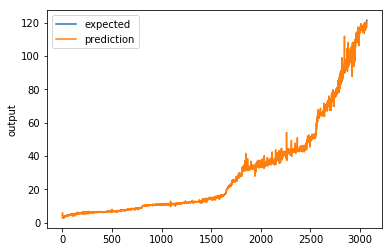

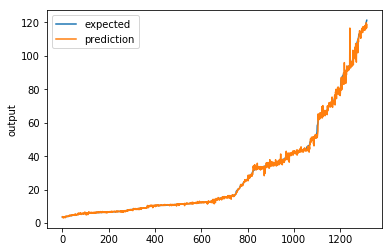

In [0]:

pred_relu_adam_train = model_cnn.predict(X_train)
pred_relu_adam_test = model_cnn.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_train, pred_relu_adam_train))
print("Score_relu_adam_train (RMSE): {}".format(rmse))
rmse = np.sqrt(metrics.mean_squared_error(y_test, pred_relu_adam_test))
print("Score_relu_adam_test (RMSE): {}".format(rmse))

#regression lift Chart
chart_regression(pred_relu_adam_train.flatten(),y_train, sort=True)
chart_regression(pred_relu_adam_test.flatten(),y_test, sort=True)

In [0]:
model_sigmoid_cnn = Sequential()
model_sigmoid_cnn.add(Conv2D(64, kernel_size=(1, 7), strides=(1, 1), padding='valid',input_shape=(1 , 7, 5), activation ="sigmoid"))
model_sigmoid_cnn.add(MaxPooling2D(pool_size=(1,1)))
model_sigmoid_cnn.add(Flatten())
model_sigmoid_cnn.add(Dense(1024, activation ="sigmoid"))
model_sigmoid_cnn.add(Dropout(0.5))
model_sigmoid_cnn.add(Dense(1))
model_sigmoid_cnn.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])
model_sigmoid_cnn.summary()

t1 = datetime.now()
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="best_weights_cnn_sigmoid.hdf5", verbose=0, save_best_only=True) # save best model
history = model_sigmoid_cnn.fit(X_train, y_train, validation_data= (X_test, y_test), callbacks=[monitor,checkpointer],verbose=2,epochs=100)
model_sigmoid_cnn.load_weights('best_weights_cnn_sigmoid.hdf5') # load weights from best model

train_time = datetime.now() - t1



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 1, 1, 64)          2304      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              66560     
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 1025      
Total params: 69,889
Trainable params: 69,889
Non-trainable params: 0
__________________________________________________

Score_sigmoid_adam_train (RMSE): 1.5920861959457397
Score_sigmoid_adam_test (RMSE): 1.5420821905136108


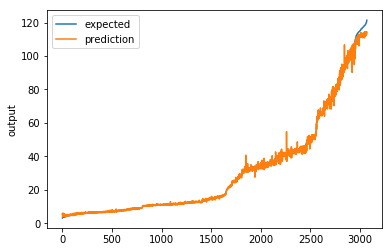

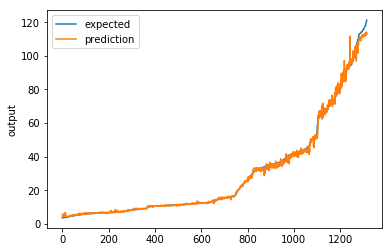

In [0]:

pred_sigmoid_adam_train = model_sigmoid_cnn.predict(X_train)
pred_sigmoid_adam_test = model_sigmoid_cnn.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_train, pred_sigmoid_adam_train))
print("Score_sigmoid_adam_train (RMSE): {}".format(rmse))
rmse = np.sqrt(metrics.mean_squared_error(y_test, pred_sigmoid_adam_test))
print("Score_sigmoid_adam_test (RMSE): {}".format(rmse))

#regression lift Chart
chart_regression(pred_sigmoid_adam_train.flatten(),y_train, sort=True)
chart_regression(pred_sigmoid_adam_test.flatten(),y_test, sort=True)

In [0]:
model_tanh_cnn = Sequential()
model_tanh_cnn.add(Conv2D(64, kernel_size=(1, 7), strides=(1, 1), padding='valid',input_shape=(1 , 7, 5), activation ="tanh"))
model_tanh_cnn.add(MaxPooling2D(pool_size=(1,1)))
model_tanh_cnn.add(Flatten())
model_tanh_cnn.add(Dense(1024, activation ="tanh"))
model_tanh_cnn.add(Dropout(0.5))
model_tanh_cnn.add(Dense(1))
model_tanh_cnn.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])
model_tanh_cnn.summary()

t1 = datetime.now()
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="best_weights_cnn_tanh.hdf5", verbose=0, save_best_only=True) # save best model
history = model_tanh_cnn.fit(X_train, y_train, validation_data= (X_test, y_test), callbacks=[monitor,checkpointer],verbose=2,epochs=100)
model_tanh_cnn.load_weights('best_weights_cnn_tanh.hdf5') # load weights from best model

train_time = datetime.now() - t1



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 1, 1, 64)          2304      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              66560     
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 1025      
Total params: 69,889
Trainable params: 69,889
Non-trainable params: 0
__________________________________________________

Score_tanh_adam_train (RMSE): 2.141810178756714
Score_tanh_adam_test (RMSE): 2.0043811798095703


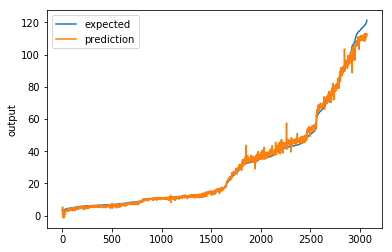

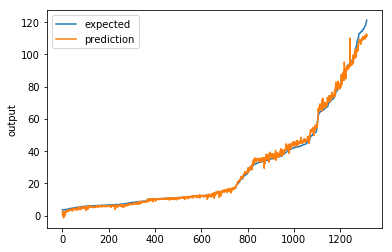

In [0]:

pred_tanh_adam_train = model_tanh_cnn.predict(X_train)
pred_tanh_adam_test = model_tanh_cnn.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_train, pred_tanh_adam_train))
print("Score_tanh_adam_train (RMSE): {}".format(rmse))
rmse = np.sqrt(metrics.mean_squared_error(y_test, pred_tanh_adam_test))
print("Score_tanh_adam_test (RMSE): {}".format(rmse))

#regression lift Chart
chart_regression(pred_tanh_adam_train.flatten(),y_train, sort=True)
chart_regression(pred_tanh_adam_test.flatten(),y_test, sort=True)

In [0]:
model_relu_sgd_cnn = Sequential()
model_relu_sgd_cnn.add(Conv2D(64, kernel_size=(1, 7), strides=(1, 1), padding='valid',input_shape=(1 , 7, 5), activation ="relu",kernel_initializer = 'Constant'))
model_relu_sgd_cnn.add(MaxPooling2D(pool_size=(1,1)))
model_relu_sgd_cnn.add(Flatten())
model_relu_sgd_cnn.add(Dense(1024, activation ="relu"))
model_relu_sgd_cnn.add(Dropout(0.5))
model_relu_sgd_cnn.add(Dense(1))
model_relu_sgd_cnn.compile(loss='mean_squared_error', optimizer='sgd', metrics = ['accuracy'])
model_relu_sgd_cnn.summary()

t1 = datetime.now()
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="best_weights_cnn_relu_sgd.hdf5", verbose=0, save_best_only=True) # save best model
history = model_relu_sgd_cnn.fit(X_train, y_train, validation_data= (X_test, y_test), callbacks=[monitor,checkpointer],verbose=2,epochs=100)
model_relu_sgd_cnn.load_weights('best_weights_cnn_relu_sgd.hdf5') # load weights from best model

train_time = datetime.now() - t1



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 1, 1, 64)          2304      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              66560     
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 1025      
Total params: 69,889
Trainable params: 69,889
Non-trainable params: 0
__________________________________________________

Score_relu_sgd_train (RMSE): 30.176280975341797
Score_relu_sgd_test (RMSE): 29.27130699157715


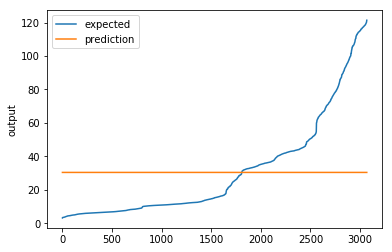

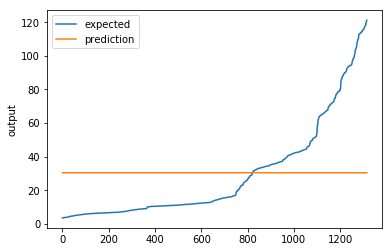

In [0]:

pred_relu_sgd_train = model_relu_sgd_cnn.predict(X_train)
pred_relu_sgd_test = model_relu_sgd_cnn.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_train, pred_relu_sgd_train))
print("Score_relu_sgd_train (RMSE): {}".format(rmse))
rmse = np.sqrt(metrics.mean_squared_error(y_test, pred_relu_sgd_test))
print("Score_relu_sgd_test (RMSE): {}".format(rmse))

#regression lift Chart
chart_regression(pred_relu_sgd_train.flatten(),y_train, sort=True)
chart_regression(pred_relu_sgd_test.flatten(),y_test, sort=True)

In [0]:
from tensorflow.keras import optimizers
model_sigmoid_sgd_cnn = Sequential()
model_sigmoid_sgd_cnn.add(Conv2D(64, kernel_size=(1, 7), strides=(1, 1), padding='valid',input_shape=(1 , 7, 5), activation ="sigmoid",kernel_initializer = 'Constant'))
model_sigmoid_sgd_cnn.add(MaxPooling2D(pool_size=(1,1)))
model_sigmoid_sgd_cnn.add(Flatten())
model_sigmoid_sgd_cnn.add(Dense(1024, activation ="sigmoid"))
model_sigmoid_sgd_cnn.add(Dropout(0.5))
model_sigmoid_sgd_cnn.add(Dense(1))

model_sigmoid_sgd_cnn.compile(loss='mean_squared_error', optimizer='sgd', metrics = ['accuracy'])
model_sigmoid_sgd_cnn.summary()

t1 = datetime.now()
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="best_weights_cnn_sigmoid_sgd.hdf5", verbose=0, save_best_only=True) # save best model
history = model_sigmoid_sgd_cnn.fit(X_train, y_train, validation_data= (X_test, y_test), callbacks=[monitor,checkpointer],verbose=2,epochs=100)
model_sigmoid_sgd_cnn.load_weights('best_weights_cnn_sigmoid_sgd.hdf5') # load weights from best model

train_time = datetime.now() - t1



Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 1, 1, 64)          2304      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              66560     
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 1025      
Total params: 69,889
Trainable params: 69,889
Non-trainable params: 0
__________________________________________________

Score_sigmoid_sgd_train (RMSE): 2.0942752361297607
Score_sigmoid_sgd_test (RMSE): 1.8720024824142456


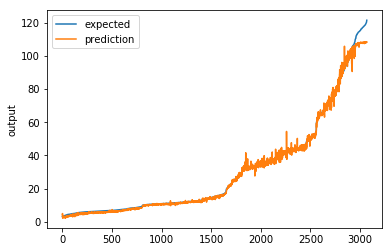

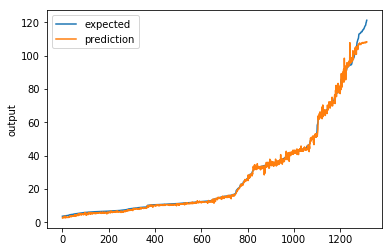

In [0]:

pred_sigmoid_sgd_train = model_sigmoid_sgd_cnn.predict(X_train)
pred_sigmoid_sgd_test = model_sigmoid_sgd_cnn.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_train, pred_sigmoid_sgd_train))
print("Score_sigmoid_sgd_train (RMSE): {}".format(rmse))
rmse = np.sqrt(metrics.mean_squared_error(y_test, pred_sigmoid_sgd_test))
print("Score_sigmoid_sgd_test (RMSE): {}".format(rmse))

#regression lift Chart
chart_regression(pred_sigmoid_sgd_train.flatten(),y_train, sort=True)
chart_regression(pred_sigmoid_sgd_test.flatten(),y_test, sort=True)

In [0]:
from tensorflow.keras import optimizers
model_tanh_sgd_cnn = Sequential()
model_tanh_sgd_cnn.add(Conv2D(64, kernel_size=(1, 7), strides=(1, 1), padding='valid',input_shape=(1 , 7, 5), activation ="tanh",kernel_initializer = 'Constant'))
model_tanh_sgd_cnn.add(MaxPooling2D(pool_size=(1,1)))
model_tanh_sgd_cnn.add(Flatten())
model_tanh_sgd_cnn.add(Dense(1024, activation ="tanh"))
model_tanh_sgd_cnn.add(Dropout(0.5))
model_tanh_sgd_cnn.add(Dense(1))

model_tanh_sgd_cnn.compile(loss='mean_squared_error', optimizer='sgd', metrics = ['accuracy'])
model_tanh_sgd_cnn.summary()

t1 = datetime.now()
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="best_weights_cnn_tanh_sgd.hdf5", verbose=0, save_best_only=True) # save best model
history = model_tanh_sgd_cnn.fit(X_train, y_train, validation_data= (X_test, y_test), callbacks=[monitor,checkpointer],verbose=2,epochs=100)
model_tanh_sgd_cnn.load_weights('best_weights_cnn_tanh_sgd.hdf5') # load weights from best model

train_time = datetime.now() - t1



Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 1, 1, 64)          2304      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 1024)              66560     
_________________________________________________________________
dropout_8 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 1025      
Total params: 69,889
Trainable params: 69,889
Non-trainable params: 0
__________________________________________________

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\callbacks.py:1234: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\callbacks.py:991: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current, self.best):


Epoch 2/100
3069/3069 - 1s - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/100
3069/3069 - 1s - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/100
3069/3069 - 1s - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/100
3069/3069 - 1s - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 00005: early stopping


Score_tanh_sgd_train (RMSE): 775.0088500976562
Score_tanh_sgd_test (RMSE): 771.6055297851562


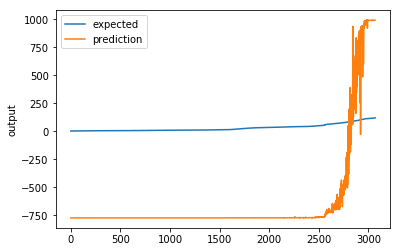

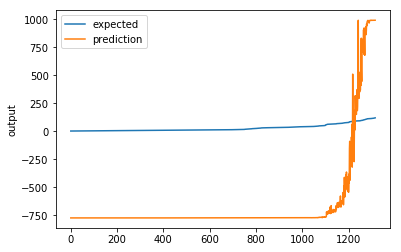

In [0]:

pred_tanh_sgd_train = model_tanh_sgd_cnn.predict(X_train)
pred_tanh_sgd_test = model_tanh_sgd_cnn.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_train, pred_tanh_sgd_train))
print("Score_tanh_sgd_train (RMSE): {}".format(rmse))
rmse = np.sqrt(metrics.mean_squared_error(y_test, pred_tanh_sgd_test))
print("Score_tanh_sgd_test (RMSE): {}".format(rmse))

#regression lift Chart
chart_regression(pred_tanh_sgd_train.flatten(),y_train, sort=True)
chart_regression(pred_tanh_sgd_test.flatten(),y_test, sort=True)